In [193]:
import csv
import os

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import keras_tuner as kt

In [194]:
dataset = 'C:/GroupPJ/USTHGroupProject/Quang/Hand_Getsure_Clean/data/new_keypoint.csv'
model_save_path = 'C:/GroupPJ/USTHGroupProject/Quang/Hand_Getsure_Clean/model save point/keypoint_classifier_1DCNN.keras'
tflite_save_path = 'C:/GroupPJ/USTHGroupProject/Quang/Hand_Getsure_Clean/model save point/keypoint_classifier_1DCNN.tflite'
label_file_path = 'C:/GroupPJ/USTHGroupProject/Quang/Hand_Getsure_Clean/data/keypoint_classifier_label.csv'
# Function to check if a file exists
def check_file_path(file_path):
    if os.path.exists(file_path):
        if os.path.isfile(file_path):
            print(f"File exists: {file_path}")
        else:
            print(f"Path exists, but it's not a file: {file_path}")
    else:
        print(f"File does not exist: {file_path}")

# Check each file
check_file_path(dataset)
check_file_path(model_save_path)
check_file_path(tflite_save_path)
check_file_path(label_file_path)


File exists: C:/GroupPJ/USTHGroupProject/Quang/Hand_Getsure_Clean/data/new_keypoint.csv
File exists: C:/GroupPJ/USTHGroupProject/Quang/Hand_Getsure_Clean/model save point/keypoint_classifier_1DCNN.keras
File exists: C:/GroupPJ/USTHGroupProject/Quang/Hand_Getsure_Clean/model save point/keypoint_classifier_1DCNN.tflite
File exists: C:/GroupPJ/USTHGroupProject/Quang/Hand_Getsure_Clean/data/keypoint_classifier_label.csv


In [195]:
df = pd.read_csv(label_file_path, header=None)
num_classes= len(df)
num_classes

6

In [196]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype=np.float32, skiprows=1, usecols=list(range(1, (21*2)+1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype=np.int32, skiprows=1, usecols=(0))

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, test_size=0.25, random_state=42)

In [198]:
print(X_train.shape)  
print(X_test.shape)   


(3931, 42)
(1311, 42)


In [199]:
import tensorflow as tf
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(42, 1)),  # Input layer for 1D CNN
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),  # Conv1D layer
    tf.keras.layers.Dropout(0.1),  # Dropout layer for regularization
    tf.keras.layers.MaxPooling1D(pool_size=2),  # Max pooling layer
    tf.keras.layers.Flatten(),  # Flatten layer to convert to dense
    tf.keras.layers.Dense(100, activation='relu'),  # Dense layer with 100 neurons
    tf.keras.layers.Dense(5, activation='softmax')  # Output layer for 5 classes
])

# Display the model summary
model.summary()


c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)               │ (None, 40, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 100)            │       128,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,861 (503.36 KB)

 Trainable params: 128,861 (503.36 KB)

 Non-trainable params: 0 (0.00 B)

In [200]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(model_save_path, verbose=1, save_weights_only=False)

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [201]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [202]:
hist = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, early_stopping]
)

Epoch 1/1000


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main

  File "c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code

  File "C:\Users\dangq\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\dangq\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\dangq\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\dangq\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever

  File "c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once

  File "c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\dangq\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 542, in dispatch_queue

  File "C:\Users\dangq\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 531, in process_one

  File "C:\Users\dangq\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\dangq\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 359, in execute_request

  File "C:\Users\dangq\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 775, in execute_request

  File "C:\Users\dangq\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 446, in do_execute

  File "C:\Users\dangq\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\dangq\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\dangq\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\dangq\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\dangq\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\dangq\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\dangq\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\dangq\AppData\Local\Temp\ipykernel_3220\769425550.py", line 1, in <module>

  File "c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 314, in fit

  File "c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 117, in one_step_on_iterator

  File "c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 104, in one_step_on_data

  File "c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\trainer.py", line 316, in compute_loss

  File "c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\compile_utils.py", line 609, in __call__

  File "c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\compile_utils.py", line 645, in call

  File "c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses\loss.py", line 43, in __call__

  File "c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses\losses.py", line 22, in call

  File "c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses\losses.py", line 1722, in sparse_categorical_crossentropy

  File "c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\ops\nn.py", line 1567, in sparse_categorical_crossentropy

  File "c:\Users\dangq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\nn.py", line 638, in sparse_categorical_crossentropy

Received a label value of 5 which is outside the valid range of [0, 5).  Label values: 4 4 1 0 4 2 4 1 5 0 2 2 3 5 5 1 5 0 1 2 3 3 2 2 4 5 1 2 4 5 5 5 5 5 2 1 4 5 1 0 1 2 4 4 0 1 2 1 5 5 3 1 2 5 2 2 1 4 4 2 3 3 3 0 3 5 2 2 4 4 4 3 4 3 0 0 3 3 2 3 2 4 5 2 4 2 3 3 2 2 3 5 1 0 5 2 1 4 3 4 2 2 1 1 5 0 2 3 5 3 3 4 2 4 1 0 4 2 0 1 1 1 1 5 2 2 3 0
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_156490]

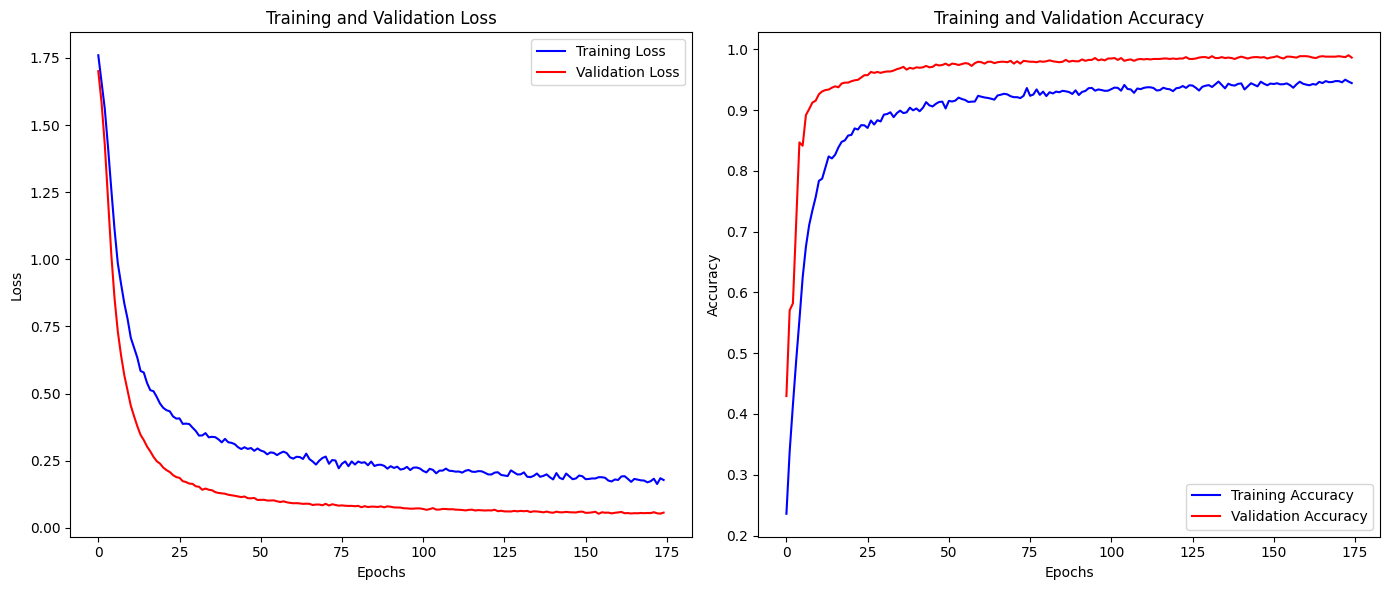

In [ ]:
# Extract accuracy and loss data from the training history
history_dict = hist.history

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the training and validation loss
ax[0].plot(history_dict['loss'], label='Training Loss', color='blue')
ax[0].plot(history_dict['val_loss'], label='Validation Loss', color='red')
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot the training and validation accuracy
ax[1].plot(history_dict['accuracy'], label='Training Accuracy', color='blue')
ax[1].plot(history_dict['val_accuracy'], label='Validation Accuracy', color='red')
ax[1].set_title('Training and Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9910 - loss: 0.0473 


In [151]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[1.1342229e-11 8.7165563e-18 1.5205978e-07 9.9997294e-01 2.6771826e-05
 1.2894614e-07]
3


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step


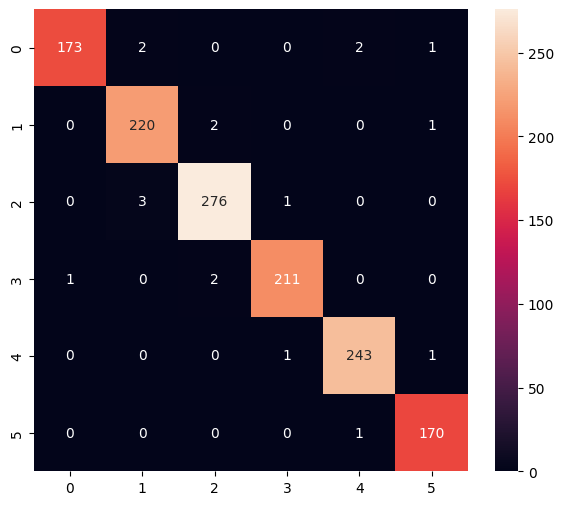

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       178
           1       0.98      0.99      0.98       223
           2       0.99      0.99      0.99       280
           3       0.99      0.99      0.99       214
           4       0.99      0.99      0.99       245
           5       0.98      0.99      0.99       171

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311



In [ ]:
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [ ]:
model.save(model_save_path, include_optimizer=False)
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 32)             │         1,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 37)             │         1,221 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 6)              │           228 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,477 (33.12 KB)

 Trainable params: 2,825 (11.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,652 (22.08 KB)

In [ ]:
# Transform model (quantization)
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Enable optimizations
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Enable resource variables and TensorFlow ops
converter.experimental_enable_resource_variables = True
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # TensorFlow Lite built-in ops
    tf.lite.OpsSet.SELECT_TF_OPS     # TensorFlow operations
]

# Convert the model
tflite_quantized_model = converter.convert()

# Save the converted model to a file
# tflite_save_path = "model_quantized.tflite"
with open(tflite_save_path, "wb") as f:
    f.write(tflite_quantized_model)

print(f"TFLite model saved to: {tflite_save_path}")


INFO:tensorflow:Assets written to: C:\Users\dangq\AppData\Local\Temp\tmp4tanrkua\assets


INFO:tensorflow:Assets written to: C:\Users\dangq\AppData\Local\Temp\tmp4tanrkua\assets


Saved artifact at 'C:\Users\dangq\AppData\Local\Temp\tmp4tanrkua'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_6')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  1928259154368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1928259141872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1928259444000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1928259446992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1928259448576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1928259451568: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite model saved to: C:/GroupPJ/USTHGroupProject/Quang/Hand_Getsure_Clean/model save point/keypoint_classifier_1DCNN.tflite


In [156]:
# Transform model (quantization)

# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tflite_quantized_model = converter.convert()

# open(tflite_save_path, 'wb').write(tflite_quantized_model)

In [157]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [137]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [138]:
print('Input details: \n',input_details)
print('\n')
print('Onput details: \n',output_details)

Input details: 
 [{'name': 'serving_default_input_layer_6:0', 'index': 0, 'shape': array([ 1, 42]), 'shape_signature': array([-1, 42]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


Onput details: 
 [{'name': 'StatefulPartitionedCall_1:0', 'index': 10, 'shape': array([1, 6]), 'shape_signature': array([-1,  6]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
